In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
combi = pd.read_table('Historical_combi2.csv',delimiter =';')

combi=combi.fillna(0)


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn import linear_model
import statsmodels.api as sm

In [2]:
# Ask for input
query =input()

ESPO


In [3]:
plotx =input()


Dubai


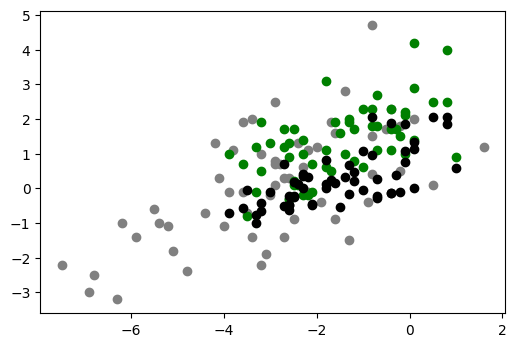

In [7]:
s = combi[query]
ss = s.iloc[s.to_numpy().nonzero()[0]]
ss.first_valid_index()

half = int((236 -ss.first_valid_index())/2)

train_combi = combi.iloc[ss.first_valid_index():ss.first_valid_index()+half,1:]
test_combi = combi.iloc[ss.first_valid_index()+half+1:,1:]

plt.rcParams['figure.dpi'] = 100

x_train=train_combi[train_combi.columns.difference([query])]
y_train=train_combi[query]

#df.drop('b', axis=1)


x_test=test_combi[test_combi.columns.difference([query])]
y_test=test_combi[query].to_frame()

regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train[plotx],y_train,   color='grey')
plt_test=plt.scatter(x_test[plotx],y_test,   color='green')
plt_pred=plt.scatter(x_test[plotx], y_pred,  color='black')

